In [1]:
import pandas as pd
import numpy as np 
from scipy.stats.stats import pearsonr

In [2]:
from collections import Counter

In [3]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')


In [4]:
#Drop Null check, etc
hour_data = hour_data.dropna()

In [5]:
hour_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [6]:
#DESCRIPTIVE STATISTICS
def descriptive_statistics(col):
    stats_ = []
    labels = ['Row Count','Min','Max','Means','Var','Std']
    stats_.append(len(col))
    stats_.append(col.min())
    stats_.append(col.max())
    stats_.append(col.max())
    stats_.append(col.mean())
    stats_.append(col.std())
    statistics_ = pd.Series(stats_,index=labels)
    
    return statistics_
descriptive_statistics(hour_data['cnt'])
    

Row Count    17379.000000
Min              1.000000
Max            977.000000
Means          977.000000
Var            189.463088
Std            181.387599
dtype: float64

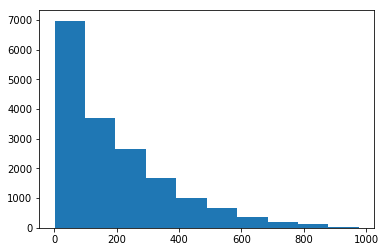

In [7]:
from matplotlib import pyplot
%matplotlib inline
pyplot.hist(hour_data['cnt'])
#pyplot.
pyplot.show()

In [11]:
#CHECKING FOR EQUIDISPERSION PROPERTY

In [8]:
def check_dispersion(col):
    print('Variance is',col.var())
    print('Mean is',col.mean())
    if col.var() == col.mean():
        print('Equidispersion')
    elif col.var() > col.mean():
        print('Overdispersion')
    else:
        print('Underdispersion')
        return False
check_dispersion(day_data['cnt'])


Variance is 3752788.2082828935
Mean is 4504.3488372093025
Overdispersion


In [9]:
#CHECKING FOR EXCESS ZERO PROBLEM

In [10]:
def check_zero_count(col):
        value_count = Counter(col['cnt'])
        if value_count[0] > len(col)/10:#check if zero rents up up to 10 percent of daily or hourly totals
            print('Decide on Zero inflated model')
        else:
            print('Zero inflated model eliminated')
            
check_zero_count(hour_data)
        

Zero inflated model eliminated


In [11]:
#CREATE NEW FEATURES
def new_cols(df):
    #Seperate Clear weather from others
    a = []
    for val in df['weathersit']:
        if val == 1:
            a.append(1)
        else:
            a.append(0)
    df['clear_others'] = pd.Series(data=a)
    #Seperate rainy and snowy from non rainy or snowy weather
    b = []
    for val in df['weathersit']:
        if val == 3:
            b.append(1)
        elif val == 4:
            b.append(1)
        else:
            b.append(0)
    df['rainySnowy_others'] = pd.Series(data=b)
    #Serparate heavy rain  from others
    c = []
    for val in df['weathersit']:
        if val == 4:
            c.append(1)
        else:
            c.append(0)
    df['heavy_rain_snow']= pd.Series(data=c)
    
    #Add new columns to df
    
    
    return df
    
new_cols(hour_data)      

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clear_others,rainySnowy_others,heavy_rain_snow
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,0,0
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0,0,0
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1,0,0
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1,0,0
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1,0,0
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1,0,0


In [12]:
#Feauture Selection
from scipy import stats
#FEATURE SELECTION
def statistic_test_(df):
    corr_array = [] 
    columns = []
    for col in df:
        if len(set(df[col])) == 2:
            #Mann Whitney U test for 2-category variables
            print(col,'--Mann Whitney Test--2 Categories')
            columns.append(col)
            corr_stats = stats.mannwhitneyu(df[col],df['cnt'],alternative='two-sided')
            corr_array.append(corr_stats)
            #n = len(reduced_df.columns)
        elif len(set(df[col])) >2 and len(set(df[col])) < 30:
            #Kruskal-Wallis H-test for 3 and more category variableS
            print(col,'--Kruskal Wallis Test--3+ Categories')
            columns.append(col)
            corr_stats = stats.kruskal(df[col],df['cnt'])
            corr_array.append(corr_stats)
        else:
            #SPEARMAN RANK ORDER TEST
            print(col,'--Spearman Rank--Continuous values')
            columns.append(col)
            corr_stats = stats.spearmanr(df[col],df['cnt'])
            corr_array.append(corr_stats)
    ser_ = pd.Series(data=corr_array,index=columns)
    return ser_
statistic_test_(hour_data)

instant --Spearman Rank--Continuous values
dteday --Spearman Rank--Continuous values
season --Kruskal Wallis Test--3+ Categories
yr --Mann Whitney Test--2 Categories
mnth --Kruskal Wallis Test--3+ Categories
hr --Kruskal Wallis Test--3+ Categories
holiday --Mann Whitney Test--2 Categories
weekday --Kruskal Wallis Test--3+ Categories
workingday --Mann Whitney Test--2 Categories
weathersit --Kruskal Wallis Test--3+ Categories
temp --Spearman Rank--Continuous values
atemp --Spearman Rank--Continuous values
hum --Spearman Rank--Continuous values
windspeed --Spearman Rank--Continuous values
casual --Spearman Rank--Continuous values
registered --Spearman Rank--Continuous values
cnt --Spearman Rank--Continuous values
clear_others --Mann Whitney Test--2 Categories
rainySnowy_others --Mann Whitney Test--2 Categories
heavy_rain_snow --Mann Whitney Test--2 Categories


O:\Installations\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


instant              (0.24374201076126137, 1.9184541482969097e-233)
dteday                 (0.2430344339317097, 4.631446521379909e-232)
season                                     (24047.04334820072, 0.0)
yr                                                  (689986.0, 0.0)
mnth                                      (19261.073450433993, 0.0)
hr                                        (15986.912541694604, 0.0)
holiday                                              (39500.0, 0.0)
weekday                                    (23080.70693225757, 0.0)
workingday                                          (937335.0, 0.0)
weathersit                                 (26153.91946093946, 0.0)
temp                                      (0.4233295244770643, 0.0)
atemp                                     (0.4232578060379263, 0.0)
hum                                       (-0.359614188399031, 0.0)
windspeed             (0.12662883138376593, 4.8097439834491973e-63)
casual                                    (0.850

In [49]:
#x_train.head(10)
#Nominal ---holiday, workingday, weathersit
#Ordinal --- Season, year
#Interval --- month,hr,weekday,
#continuous --- temp,atemp,hum,windspeed,casual,registered

In [79]:
#OUR NEGATIVE BINOMIAL MODEL
import statsmodels.formula.api as smf
import statsmodels.formula as sm
#Wrap statsmodel.formula for cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, RegressorMixin
class statsmodel_sklearn_wrap(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None
 
    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()
        
        #result = nbmodel.fit()
        #x1 = result.predict(test_df).astype('int64')
        #x1
    def predict(self,X):
        return self.result.predict(X).astype('int64')
    
y_idx = hour_data.columns.get_loc('cnt')
hour_data['cnt']= hour_data['cnt'].astype('int')

formula = 'cnt ~ heavy_rain_snow + temp + hum + atemp + hum + casual + registered'
wrap = statsmodel_sklearn_wrap(smf.ols, formula)
nbmodel = cross_val_score(wrap, hour_data,hour_data.iloc[:,y_idx],cv=10,scoring='neg_mean_absolute_error')
nbm_predict =cross_val_predict(wrap, hour_data,hour_data.iloc[:,y_idx],cv=10)
nbm_predict2 = smf.ols(formula = 'cnt ~ heavy_rain_snow + temp + hum + atemp + hum + casual + registered', data=train_df).fit()




In [75]:
#Standard Deviation
nbmodel.std()

0.28141896682664885

In [77]:
#Absolute Mean rror
nbmodel.mean()

-0.31438434982738783

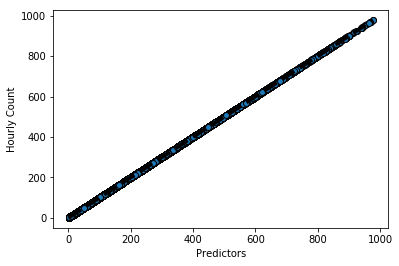

In [53]:
#Plot our MOdel
y = hour_data.iloc[:,y_idx]
fig, ax = pyplot.subplots()
ax.scatter(y, nbm_predict, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Predictors')
ax.set_ylabel('Hourly Count')
pyplot.show()